Importing Modules

In [562]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

Data preprocessing

In [563]:
data=pd.read_csv('CanadaData.csv')

In [564]:
data

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km)
0,1995,Acura,Integra,Subcompact,1.8,4,A4,X,10.2,7.0,8.8,32,202
1,1995,Acura,Integra,Subcompact,1.8,4,M5,X,9.6,7.0,8.4,34,193
2,1995,Acura,Integra GS-R,Subcompact,1.8,4,M5,Z,9.4,7.0,8.3,34,191
3,1995,Acura,Legend,Compact,3.2,6,A4,Z,12.6,8.9,10.9,26,251
4,1995,Acura,Legend Coupe,Compact,3.2,6,A4,Z,13.0,9.3,11.3,25,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17761,2014,Volvo,XC60 AWD,Sport utility vehicle: Small,3.0,6,AS6,X,11.9,8.3,10.3,27,237
17762,2014,Volvo,XC60 AWD,Sport utility vehicle: Small,3.2,6,AS6,X,11.7,8.0,10.0,28,230
17763,2014,Volvo,XC70 AWD,Sport utility vehicle: Small,3.0,6,AS6,X,11.9,8.3,10.3,27,237
17764,2014,Volvo,XC70 AWD,Sport utility vehicle: Small,3.2,6,AS6,X,11.4,7.8,9.8,29,225


In [565]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17766 entries, 0 to 17765
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            17766 non-null  int64  
 1   Make                  17766 non-null  object 
 2   Model                 17766 non-null  object 
 3   Vehicle class         17766 non-null  object 
 4   Engine size (L)       17766 non-null  float64
 5   Cylinders             17766 non-null  int64  
 6   Transmission          17766 non-null  object 
 7   Fuel type             17766 non-null  object 
 8   City (L/100 km)       17766 non-null  float64
 9   Highway (L/100 km)    17766 non-null  float64
 10  Combined (L/100 km)   17766 non-null  float64
 11  Combined (mpg)        17766 non-null  int64  
 12  CO2 emissions (g/km)  17766 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 1.8+ MB


In [566]:
data.columns

Index(['Model year', 'Make', 'Model', 'Vehicle class', 'Engine size (L)',
       'Cylinders', 'Transmission', 'Fuel type', 'City (L/100 km)',
       'Highway (L/100 km)', 'Combined (L/100 km)', 'Combined (mpg)',
       'CO2 emissions (g/km)'],
      dtype='object')

In [567]:
data[['Engine size (L)','CO2 emissions (g/km)','Cylinders']].corr()

,Engine size (L),CO2 emissions (g/km),Cylinders
Engine size (L),1.000000,0.829355,0.901804
CO2 emissions (g/km),0.829355,1.000000,0.787078
Cylinders,0.901804,0.787078,1.000000


In [568]:
df= data.drop(['Model year','Make','Model','City (L/100 km)','Highway (L/100 km)','Combined (mpg)'],axis=1)

In [569]:
df

,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,Combined (L/100 km),CO2 emissions (g/km)
0,Subcompact,1.8,4,A4,X,8.8,202
1,Subcompact,1.8,4,M5,X,8.4,193
2,Subcompact,1.8,4,M5,Z,8.3,191
3,Compact,3.2,6,A4,Z,10.9,251
4,Compact,3.2,6,A4,Z,11.3,260
...,...,...,...,...,...,...,...
17761,Sport utility vehicle: Small,3.0,6,AS6,X,10.3,237
17762,Sport utility vehicle: Small,3.2,6,AS6,X,10.0,230
17763,Sport utility vehicle: Small,3.0,6,AS6,X,10.3,237
17764,Sport utility vehicle: Small,3.2,6,AS6,X,9.8,225


In [570]:
df.columns


Index(['Vehicle class', 'Engine size (L)', 'Cylinders', 'Transmission',
       'Fuel type', 'Combined (L/100 km)', 'CO2 emissions (g/km)'],
      dtype='object')

In [571]:
df=df.rename(columns={'Vehicle Class':'Vehicle Class','Engine size (L)':'Engine size','Cylinders':'Cylinders','Transmission':'Transmission','Fuel type':'Fuel type','Combined (L/100 km)':'Fuel Consumption','CO2 emissions (g/km)':'CO2 emission'})

In [572]:
df.isna().sum()

Vehicle class       0
Engine size         0
Cylinders           0
Transmission        0
Fuel type           0
Fuel Consumption    0
CO2 emission        0
dtype: int64

In [573]:
df['Fuel type'].fillna((df['Fuel type'].mode()[0]),inplace=True)

In [574]:
df.head()

,Vehicle class,Engine size,Cylinders,Transmission,Fuel type,Fuel Consumption,CO2 emission
0,Subcompact,1.8,4,A4,X,8.8,202
1,Subcompact,1.8,4,M5,X,8.4,193
2,Subcompact,1.8,4,M5,Z,8.3,191
3,Compact,3.2,6,A4,Z,10.9,251
4,Compact,3.2,6,A4,Z,11.3,260


In [575]:
df[['Fuel Consumption','CO2 emission']].corr()

,Fuel Consumption,CO2 emission
Fuel Consumption,1.000000,0.929144
CO2 emission,0.929144,1.000000


In [576]:
df.describe()

,Engine size,Cylinders,Fuel Consumption,CO2 emission
count,17766.000000,17766.000000,17766.000000,17766.000000
mean,3.452313,5.949679,11.140673,251.355342
std,1.326899,1.750799,2.930980,60.220017
min,0.800000,2.000000,3.600000,83.000000
25%,2.400000,4.000000,9.200000,210.000000
50%,3.300000,6.000000,10.600000,242.000000
75%,4.300000,8.000000,12.900000,290.000000
max,8.400000,16.000000,24.800000,570.000000


In [577]:
def co2_rating(emission):
    num_bins=10
    bins=np.linspace(580,60,num_bins+1)
    rating=np.digitize(emission,bins,right=True)
    return rating
df=pd.DataFrame(df)   
df['CO2 Rating'] = df['CO2 emission'].apply(co2_rating)

In [578]:
df

,Vehicle class,Engine size,Cylinders,Transmission,Fuel type,Fuel Consumption,CO2 emission,CO2 Rating
0,Subcompact,1.8,4,A4,X,8.8,202,8
1,Subcompact,1.8,4,M5,X,8.4,193,8
2,Subcompact,1.8,4,M5,Z,8.3,191,8
3,Compact,3.2,6,A4,Z,10.9,251,7
4,Compact,3.2,6,A4,Z,11.3,260,7
...,...,...,...,...,...,...,...,...
17761,Sport utility vehicle: Small,3.0,6,AS6,X,10.3,237,7
17762,Sport utility vehicle: Small,3.2,6,AS6,X,10.0,230,7
17763,Sport utility vehicle: Small,3.0,6,AS6,X,10.3,237,7
17764,Sport utility vehicle: Small,3.2,6,AS6,X,9.8,225,7


In [579]:
df=df.drop(['CO2 emission'],axis=1)

In [580]:
df['CO2 Rating'].describe()

count    17766.000000
mean         6.838343
std          1.200941
min          1.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: CO2 Rating, dtype: float64

In [581]:
df[['Fuel Consumption','CO2 Rating']].corr()

,Fuel Consumption,CO2 Rating
Fuel Consumption,1.000000,-0.898171
CO2 Rating,-0.898171,1.000000


In [582]:
df[['Fuel Consumption','CO2 Rating']].groupby('CO2 Rating').median()

,Fuel Consumption
CO2 Rating,
1,24.8
2,21.3
3,19.2
4,16.8
5,14.9
6,12.8
7,10.4
8,8.6
9,6.7


In [583]:
df['CO2 Rating'].fillna(0,inplace=True)
new_ratting = []

for fuel,co2 in zip(df['Fuel Consumption'], df['CO2 Rating']):
    if co2==0:
        if 20 <= fuel:
            new_ratting.append(1)
        elif 16.0 <= fuel < 20.0:
            new_ratting.append(2) 
        elif 14.0 <= fuel < 16.0: 
            new_ratting.append(3)
        elif 12.0 <= fuel < 14.0: 
            new_ratting.append(4)
        elif 10.0 <= fuel < 12.0: 
            new_ratting.append(5)
        elif 8.0 <= fuel < 10.0: 
            new_ratting.append(6)
        elif 7.0 <= fuel < 8.0: 
            new_ratting.append(7)
        elif 6.0 <= fuel < 7.0: 
            new_ratting.append(8)
        elif 5.0 <= fuel < 6.0: 
            new_ratting.append(9)
        elif fuel < 5.0: 
            new_ratting.append(10)            
    else:
        new_ratting.append(co2)
        
        
df['CO2 Rating'] = new_ratting

In [584]:
df.isna().sum()

Vehicle class       0
Engine size         0
Cylinders           0
Transmission        0
Fuel type           0
Fuel Consumption    0
CO2 Rating          0
dtype: int64

In [585]:
df[['Engine size', 'Cylinders', 'Fuel Consumption','CO2 Rating']].corr()

,Engine size,Cylinders,Fuel Consumption,CO2 Rating
Engine size,1.000000,0.901804,0.812942,-0.803626
Cylinders,0.901804,1.000000,0.763916,-0.760653
Fuel Consumption,0.812942,0.763916,1.000000,-0.898171
CO2 Rating,-0.803626,-0.760653,-0.898171,1.000000


In [586]:
#Checking correlation of each feature against target variable
df[['Engine size', 'Cylinders', 'Fuel Consumption','CO2 Rating']].corr()["Fuel Consumption"].to_frame()

,Fuel Consumption
Engine size,0.812942
Cylinders,0.763916
Fuel Consumption,1.000000
CO2 Rating,-0.898171


In [587]:
for i in df.columns:
    print(i)
    print(df[i].unique(),'\n')

Vehicle class
['Subcompact' 'Compact' 'Two-seater' 'Station wagon: Small' 'Minicompact'
 'Mid-size' 'Full-size' 'Station wagon: Mid-size' 'Van: Cargo'
 'Van: Passenger' 'Pickup truck: Standard' 'Sport utility vehicle'
 'Minivan' 'Pickup truck: Small' 'Special purpose vehicle'
 'Sport utility vehicle: Small' 'Sport utility vehicle: Standard'] 

Engine size
[1.8 3.2 3.  2.8 2.2 6.7 2.  2.5 4.  5.4 3.1 3.8 5.7 2.3 4.6 4.9 4.3 5.
 6.5 3.4 1.6 3.3 3.5 1.5 3.9 5.2 5.9 8.  2.4 5.5 1.3 5.8 1.9 1.  2.7 4.5
 6.  4.2 2.6 3.6 1.2 2.9 4.4 4.1 4.8 5.3 4.7 1.7 3.7 8.3 5.6 6.1 0.8 7.
 6.2 6.8 8.4 6.6 1.4 6.4 6.3 2.1] 

Cylinders
[ 4  6  5  8 12 10  3  2 16] 

Transmission
['A4' 'M5' 'M6' 'A5' 'A3' 'M4' 'AS4' 'AS6' 'AS5' 'AV' 'A6' 'AM6' 'A7'
 'AM7' 'AS7' 'AS8' 'A8' 'M7' 'AV7' 'AV8' 'AV6' 'AM5' 'A9' 'AS9'] 

Fuel type
['X' 'Z' 'D' 'N' 'E'] 

Fuel Consumption
[ 8.8  8.4  8.3 10.9 11.3 11.2 11.6 11.1 13.1 10.8 10.3 10.6 11.4 11.5
 19.  19.1 18.6 19.2 19.6  9.6  9.   8.9  9.9 10.1 10.2 11.7 12.3 12.1
 14.3

Transmission 
A = Automatic
AM = Automated manual
AS = Automatic with select shift
AV = Continuously variable
M = Manual
3 - 10 = Number of gears

In [588]:
df['Transmission'] = df['Transmission'].str.replace(r'\d+', '', regex=True)

In [589]:
df

,Vehicle class,Engine size,Cylinders,Transmission,Fuel type,Fuel Consumption,CO2 Rating
0,Subcompact,1.8,4,A,X,8.8,8
1,Subcompact,1.8,4,M,X,8.4,8
2,Subcompact,1.8,4,M,Z,8.3,8
3,Compact,3.2,6,A,Z,10.9,7
4,Compact,3.2,6,A,Z,11.3,7
...,...,...,...,...,...,...,...
17761,Sport utility vehicle: Small,3.0,6,AS,X,10.3,7
17762,Sport utility vehicle: Small,3.2,6,AS,X,10.0,7
17763,Sport utility vehicle: Small,3.0,6,AS,X,10.3,7
17764,Sport utility vehicle: Small,3.2,6,AS,X,9.8,7


In [590]:
df['Transmission'].unique()

array(['A', 'M', 'AS', 'AV', 'AM'], dtype=object)

EDA

Univariate Analysis

In [591]:
df[['Engine size','Cylinders','Fuel Consumption','CO2 Rating']].describe()


,Engine size,Cylinders,Fuel Consumption,CO2 Rating
count,17766.000000,17766.000000,17766.000000,17766.000000
mean,3.452313,5.949679,11.140673,6.838343
std,1.326899,1.750799,2.930980,1.200941
min,0.800000,2.000000,3.600000,1.000000
25%,2.400000,4.000000,9.200000,6.000000
50%,3.300000,6.000000,10.600000,7.000000
75%,4.300000,8.000000,12.900000,8.000000
max,8.400000,16.000000,24.800000,10.000000


In [592]:
df.columns

Index(['Vehicle class', 'Engine size', 'Cylinders', 'Transmission',
       'Fuel type', 'Fuel Consumption', 'CO2 Rating'],
      dtype='object')

Frequency Distribution

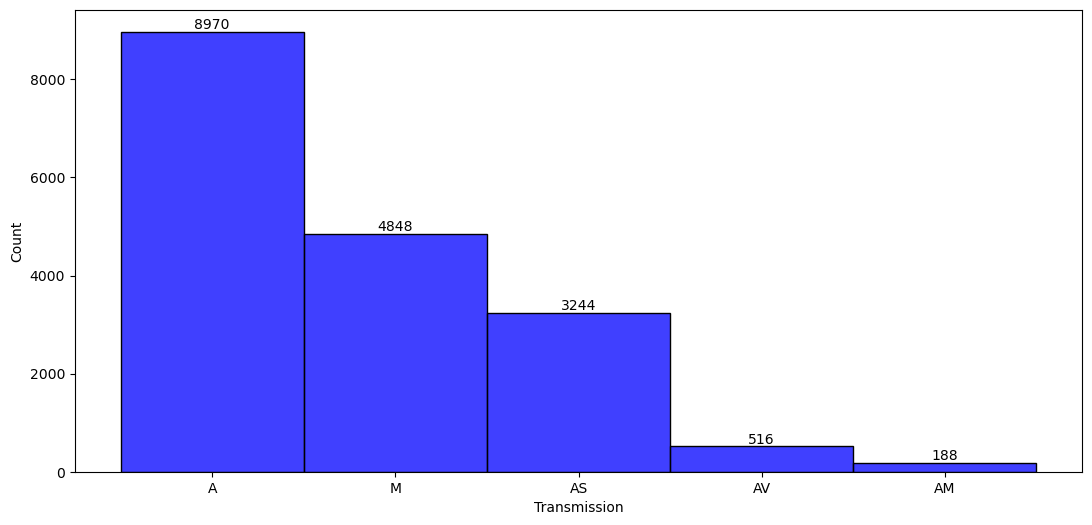

In [593]:
plt.figure(figsize=(13,6))
chart1=sns.histplot(data=df,x='Transmission',color='Blue')
chart1.bar_label(chart1.containers[0],size=10)
plt.show()

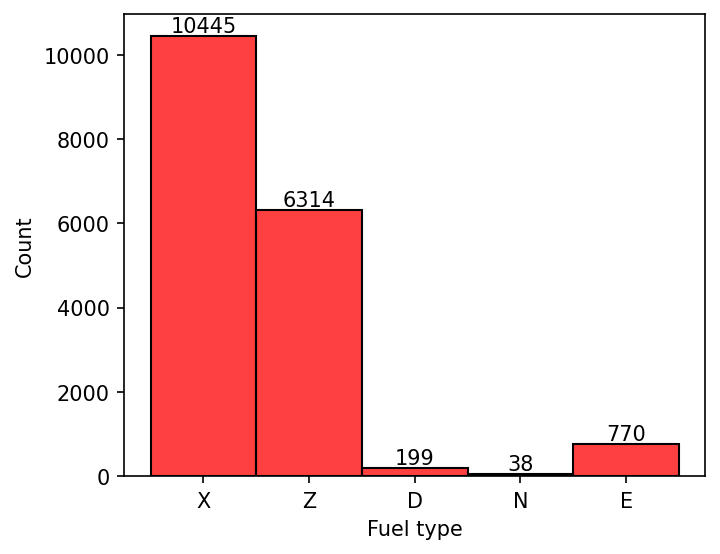

In [594]:
plt.figure(figsize=(5,4), dpi=150)
chart1=sns.histplot(data=df, x='Fuel type', color='Red')
chart1.bar_label(chart1.containers[0],size=10)
plt.show()

Z=  Premium gasoline 
D=  Diesel 
E=  Ethanol 
X=Regular gasoline
N = Natural gas

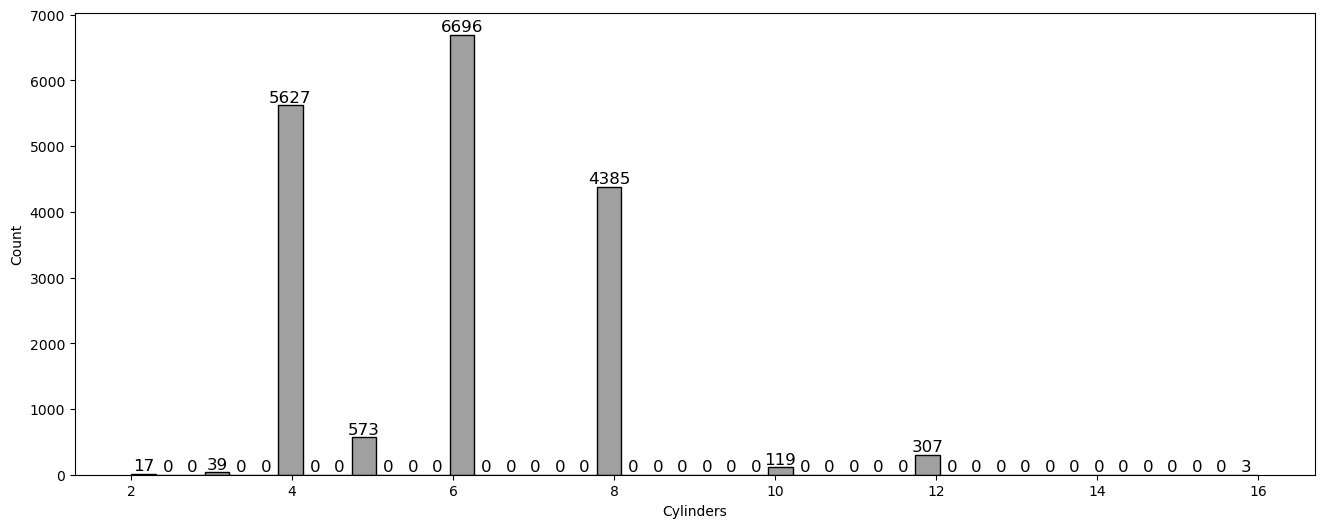

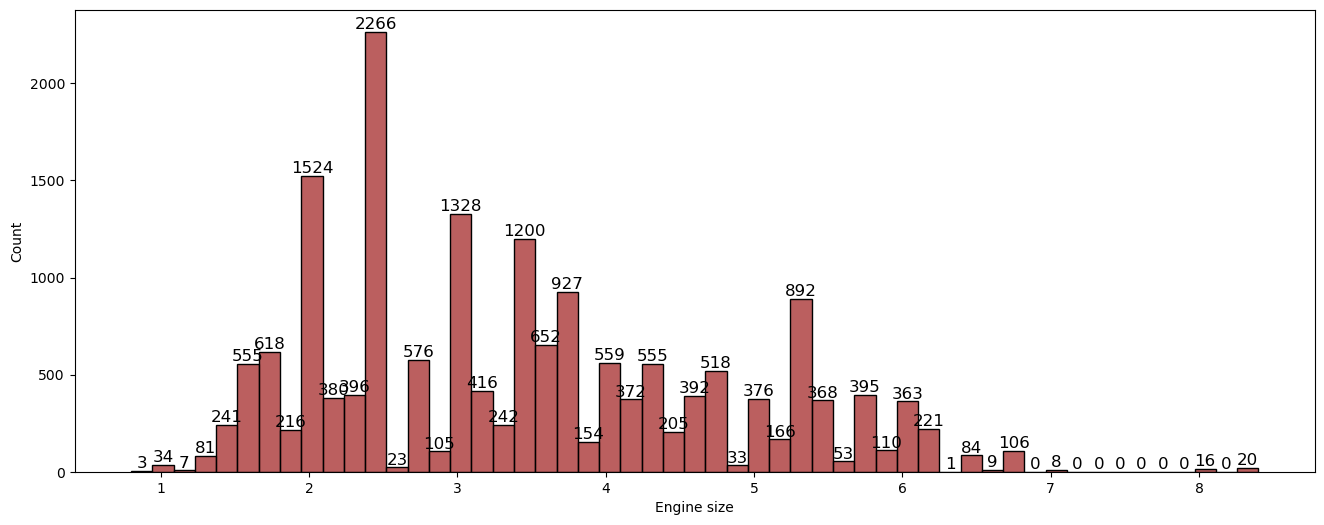

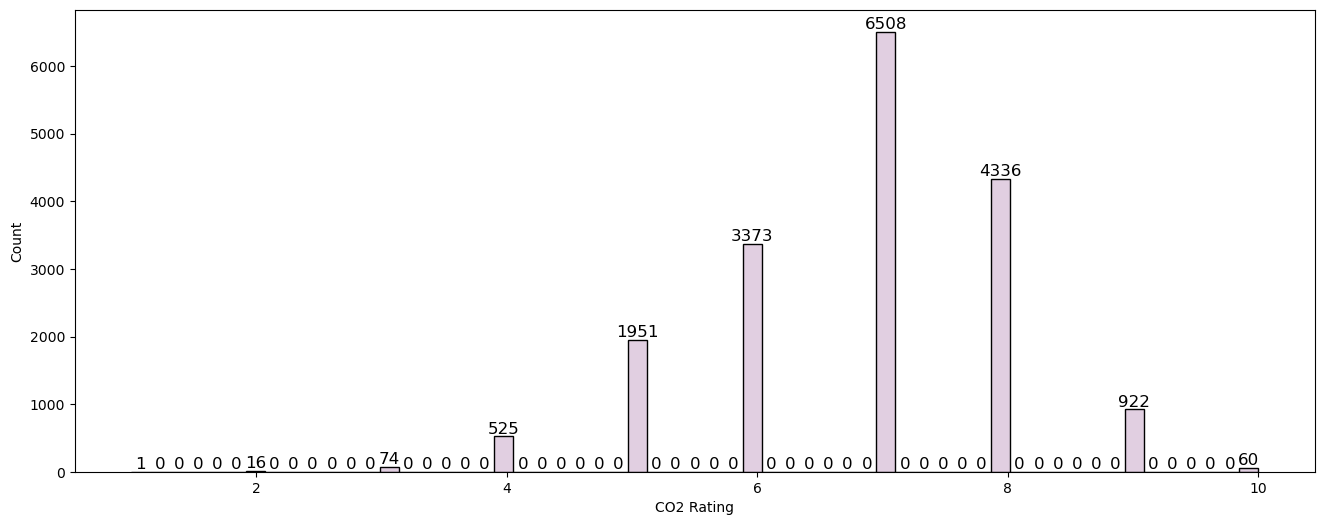

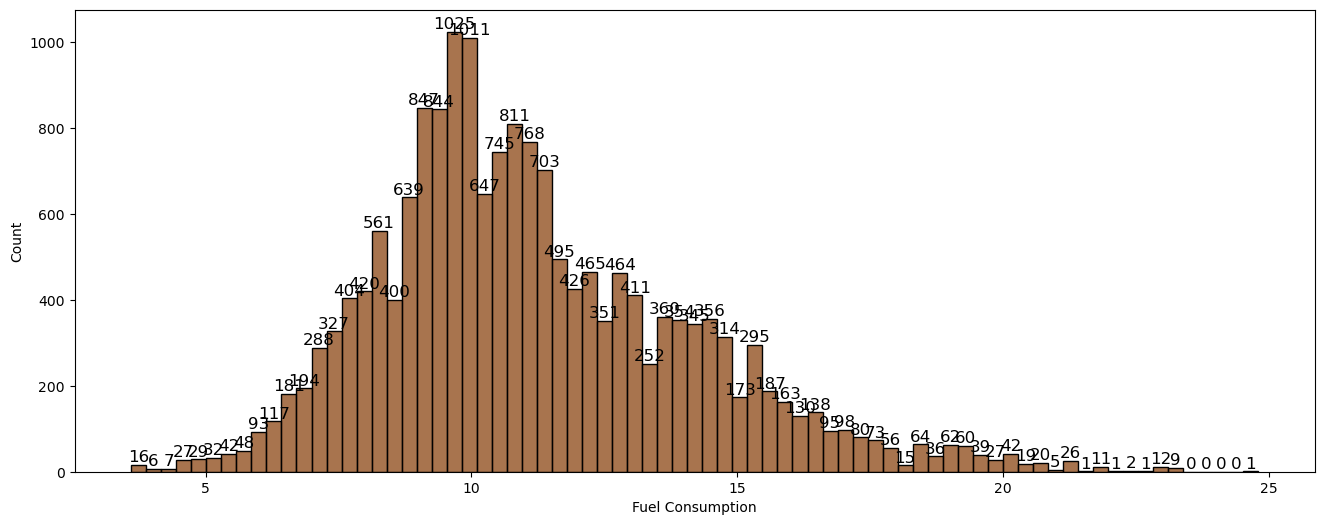

In [595]:
column_set = ['Cylinders','Engine size','CO2 Rating','Fuel Consumption']
color_set = ['grey','brown','Thistle', 'SaddleBrown']
for colors,col in zip(color_set,column_set):
    plt.figure(figsize=(16,6))
    chart1=sns.histplot(data=df, x=col, color=colors)
    chart1.bar_label(chart1.containers[0],size=12)
    plt.show()

<Figure size 1950x900 with 0 Axes>

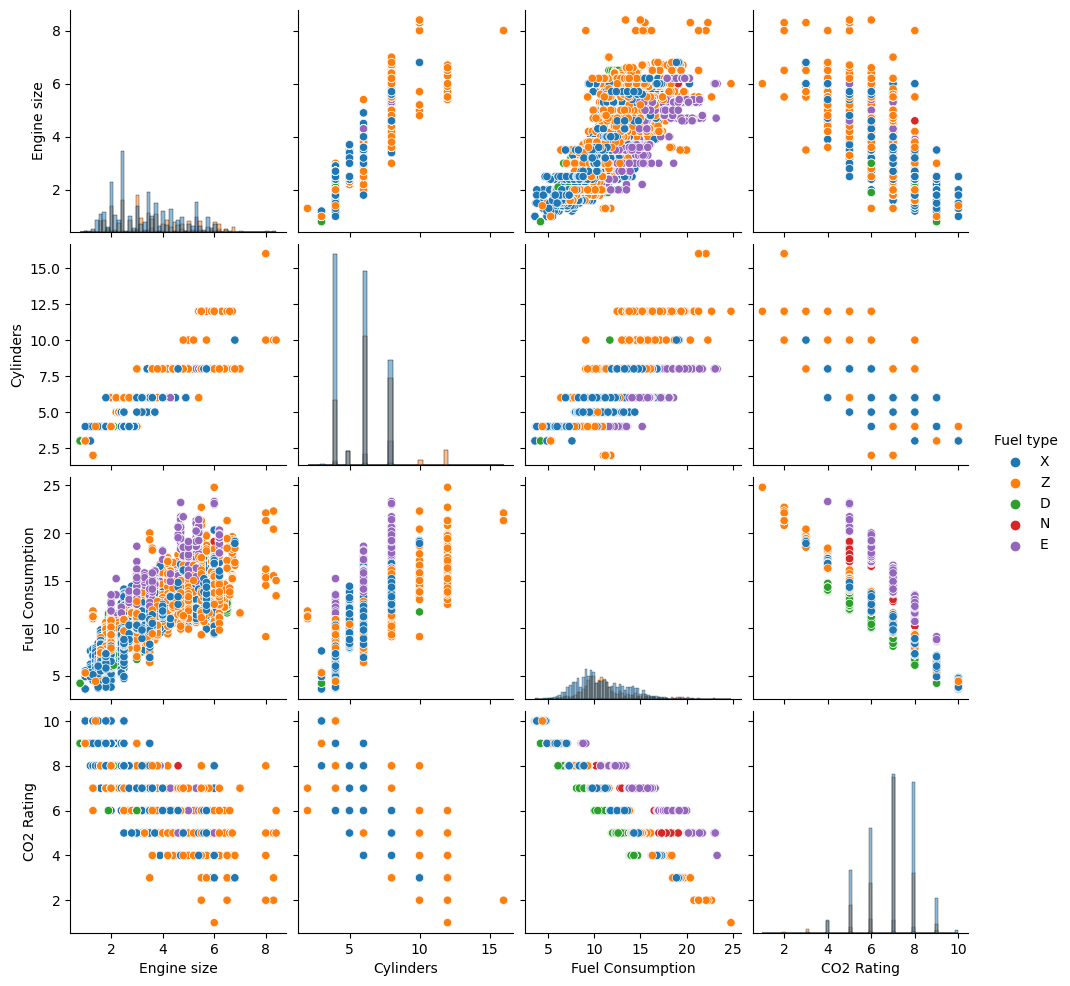

In [596]:
plt.figure(figsize=(13,6), dpi=150)
sns.pairplot(df, hue='Fuel type',diag_kind='hist')

4.2 Comparison between "No. of cylinders" & "Fuel consumption"

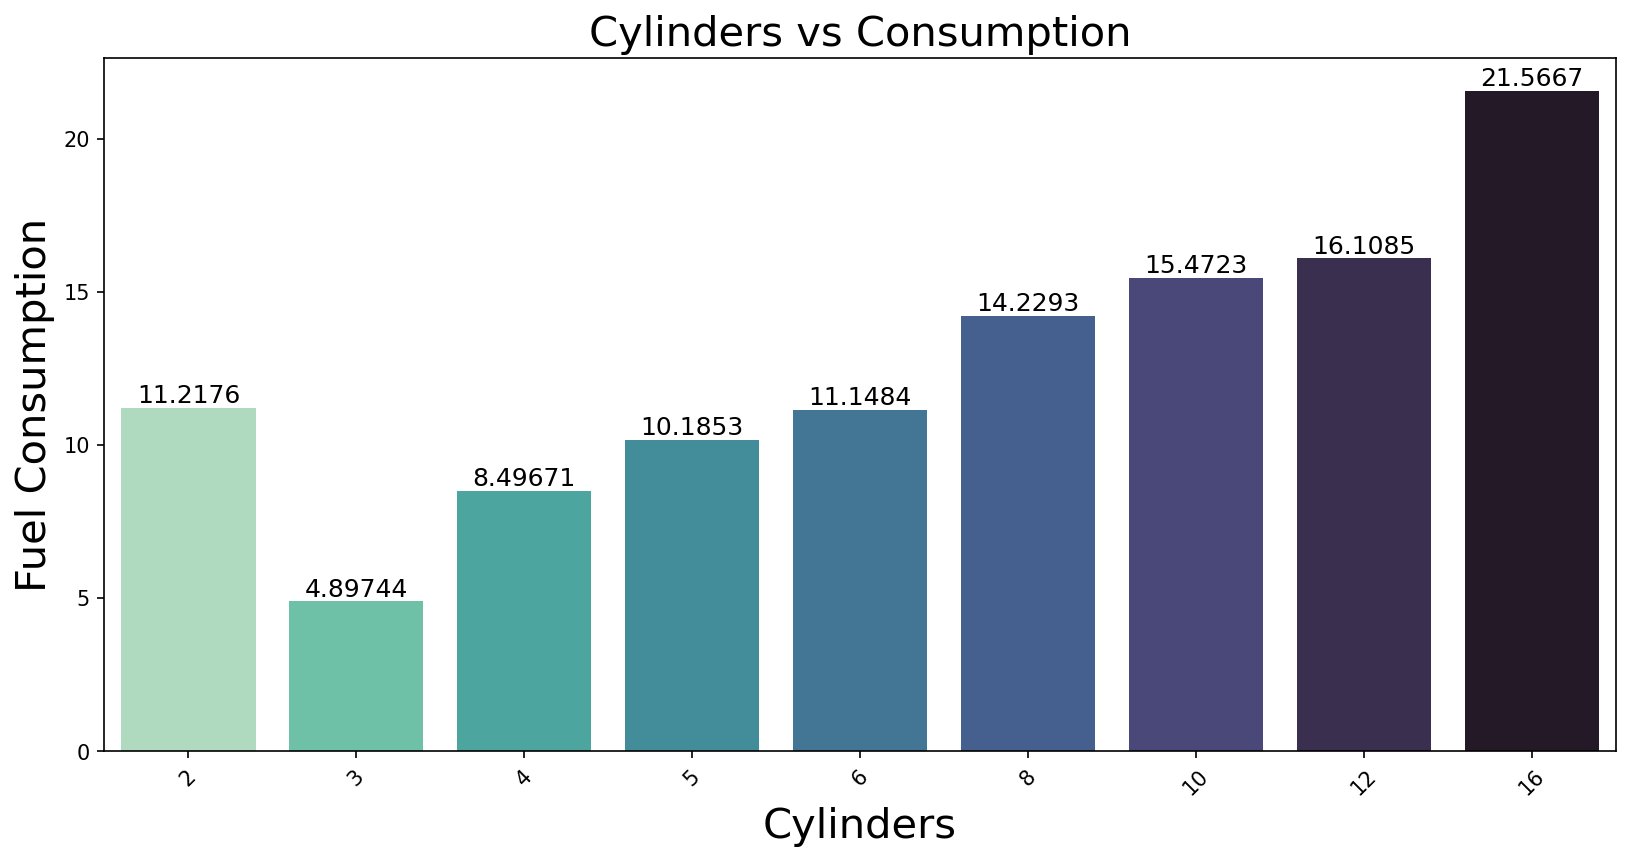

In [597]:
plt.figure(figsize=(13,6), dpi=150)
plt.xticks(rotation=45)
plt.title('Cylinders vs Consumption',size=20)
chart1=sns.barplot( data=df, x="Cylinders", y="Fuel Consumption",palette='mako_r', ci=None)
plt.xlabel('Cylinders',size=20)
plt.ylabel('Fuel Consumption',size=20)
chart1.bar_label(chart1.containers[0],size=12)
plt.show()

<Axes: >

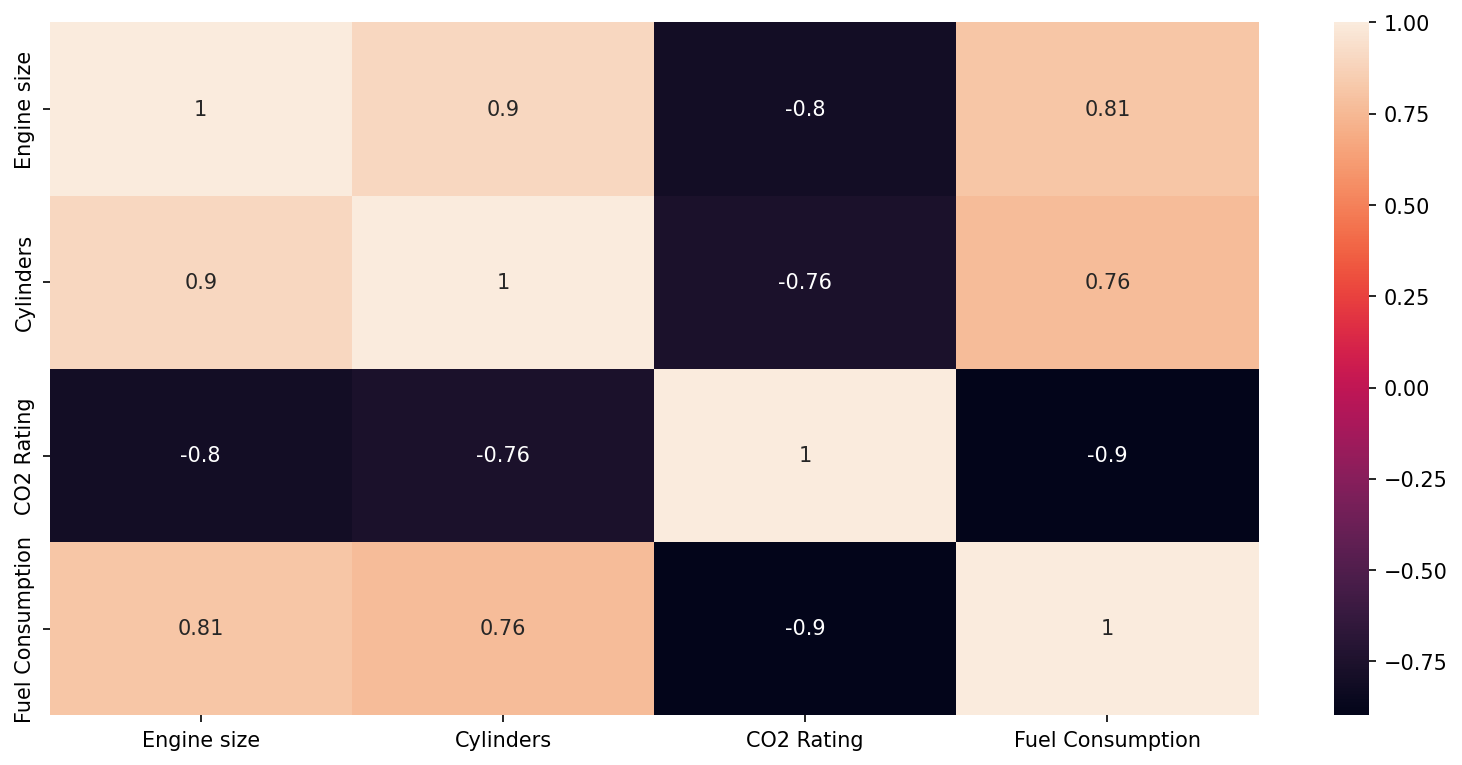

In [598]:
plt.figure(figsize=(13,6), dpi=150)
sns.heatmap(df[['Engine size','Cylinders','CO2 Rating','Fuel Consumption']].corr(),annot=True)

Performing chisquare:-

In [599]:
fuel_type= pd.crosstab(df['Transmission'],df['Fuel type'])

In [600]:
fuel_type

Fuel type,D,E,N,X,Z
Transmission,,,,,
A,110,661,38,5914,2247
AM,0,0,0,7,181
AS,25,87,0,1285,1847
AV,0,0,0,429,87
M,64,22,0,2810,1952


In [601]:
from scipy.stats import chi2_contingency

#data transformation
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [602]:
df.columns

Index(['Vehicle class', 'Engine size', 'Cylinders', 'Transmission',
       'Fuel type', 'Fuel Consumption', 'CO2 Rating'],
      dtype='object')

In [603]:
fuel_type= pd.crosstab(df['Transmission'],df['Fuel type'])

In [604]:
fuel_type

Fuel type,D,E,N,X,Z
Transmission,,,,,
A,110,661,38,5914,2247
AM,0,0,0,7,181
AS,25,87,0,1285,1847
AV,0,0,0,429,87
M,64,22,0,2810,1952


In [605]:
Chi_square_statistic,p,dof,expec = chi2_contingency(fuel_type)

In [606]:
alpha = 0.05
print("p_value is " + str(p))
if p <= alpha:
    print('Dependent')
    print('dof is ' +str(dof))
else:
    print('Independent')
    print('dof is ' +str(dof))

p_value is 0.0
Dependent
dof is 16


In [607]:
Class=pd.crosstab(df['Transmission'],df['Vehicle class'])

In [608]:
Class

Vehicle class,Compact,Full-size,Mid-size,Minicompact,Minivan,Pickup truck: Small,Pickup truck: Standard,Special purpose vehicle,Sport utility vehicle,Sport utility vehicle: Small,Sport utility vehicle: Standard,Station wagon: Mid-size,Station wagon: Small,Subcompact,Two-seater,Van: Cargo,Van: Passenger
Transmission,,,,,,,,,,,,,,,,,
A,1028,664,957,134,453,245,1403,8,1809,94,105,206,202,680,165,464,353
AM,21,15,17,32,0,0,0,0,0,2,0,0,4,56,41,0,0
AS,470,278,651,202,45,0,82,6,541,119,84,99,144,257,266,0,0
AV,91,5,113,11,3,0,20,2,145,39,11,3,49,20,4,0,0
M,1071,29,447,324,14,149,582,0,543,40,2,135,294,792,421,5,0


In [609]:
Chi_square_statistic,p,dof,expec = chi2_contingency(Class)


In [610]:
alpha = 0.05
print("p_value is " + str(p))
if p <= alpha:
    print('Dependent')
    print('dof is ' +str(dof))
else:
    print('Independent')
    print('dof is ' +str(dof))

p_value is 0.0
Dependent
dof is 64


OUTLIER ANALYSIS

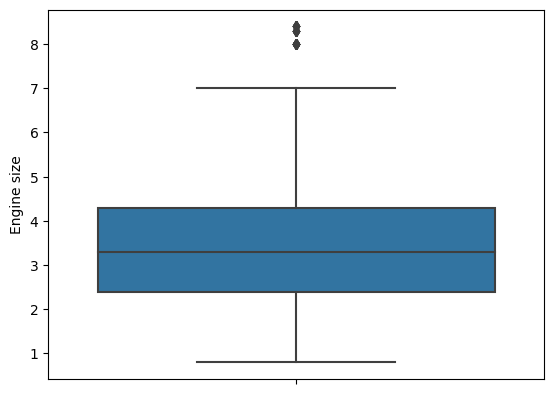

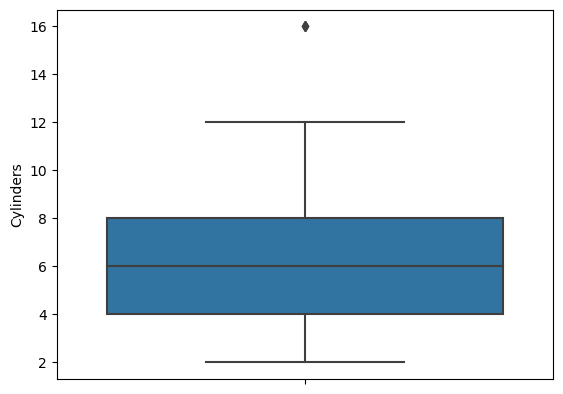

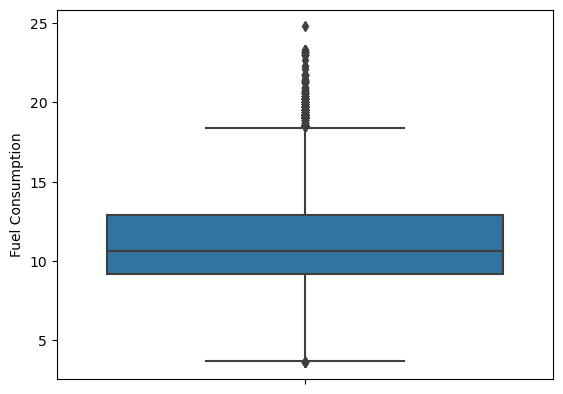

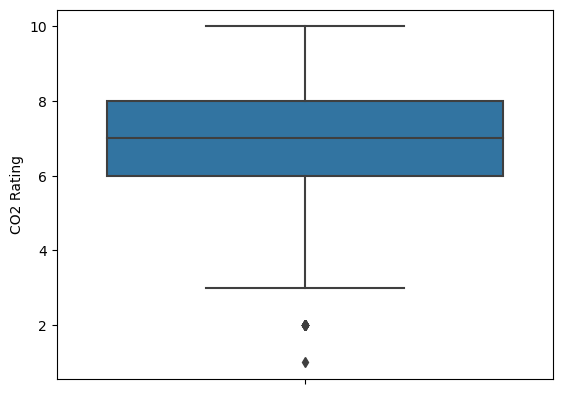

In [611]:
for col in df.columns:
    if df[col].dtypes!= object:
        sns.boxplot(y=col,data=df)
        plt.show()

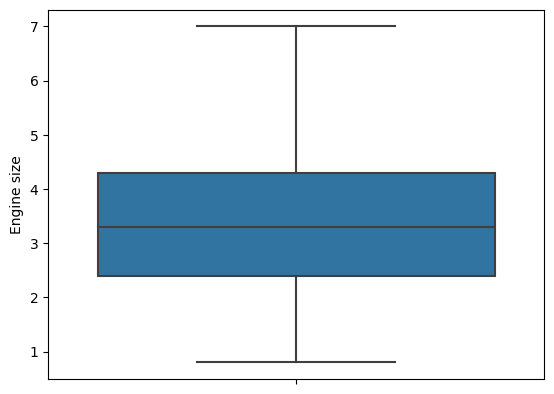

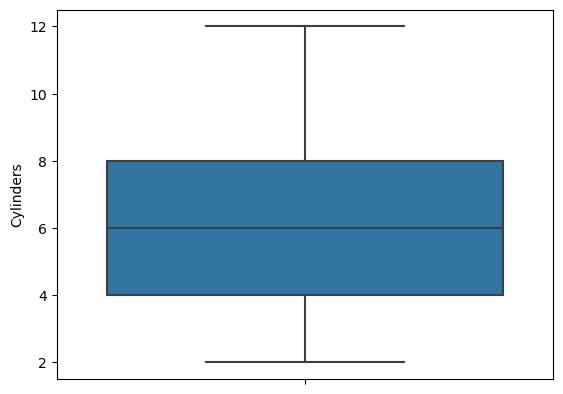

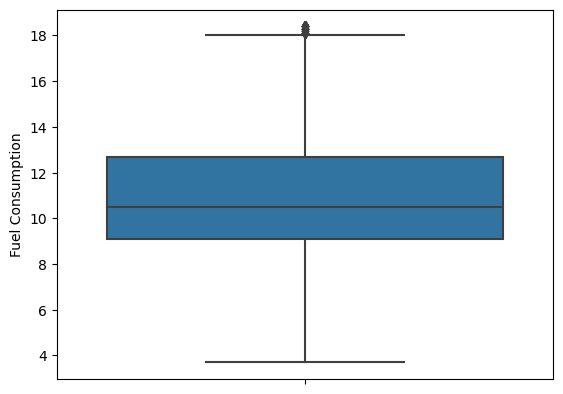

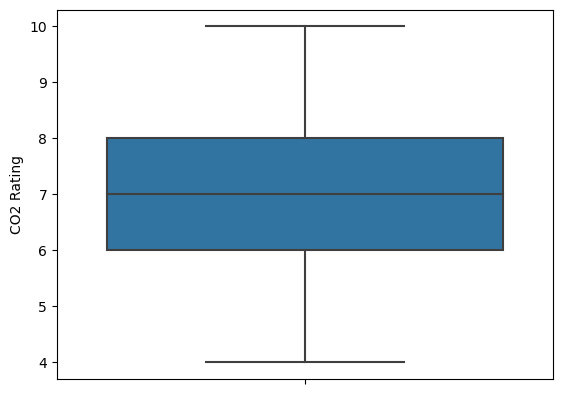

In [612]:
for col in df.columns:
    if df[col].dtypes!= object:
        percentile_25=df[col].quantile(0.25)
        percentile_75=df[col].quantile(0.75)
        IQR=percentile_75-percentile_25
        upper_limit=percentile_75+(1.5*IQR)
        lower_limit=percentile_25-(1.5*IQR)
        df=df[df[col]<=upper_limit]
        df=df[df[col]>=lower_limit]
        plt.figure()
        sns.boxplot(y=col,data=df)

In [613]:
df.shape

(17336, 7)

Ordinal encoding

In [614]:


# from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

order = ['AV', 'AM', 'M', 'AS', 'A']

od = OrdinalEncoder(categories = [order])

df["Transmission_X"] = od.fit_transform(df[["Transmission"]])



In [615]:
df['Vehicle class'].unique()

array(['Subcompact', 'Compact', 'Two-seater', 'Station wagon: Small',
       'Minicompact', 'Mid-size', 'Station wagon: Mid-size', 'Full-size',
       'Van: Cargo', 'Van: Passenger', 'Pickup truck: Standard',
       'Sport utility vehicle', 'Minivan', 'Pickup truck: Small',
       'Special purpose vehicle', 'Sport utility vehicle: Small',
       'Sport utility vehicle: Standard'], dtype=object)

In [616]:
order = ['Subcompact', 'Compact', 'Two-seater', 'Station wagon: Small',
       'Minicompact', 'Mid-size', 'Station wagon: Mid-size', 'Full-size',
       'Van: Cargo', 'Van: Passenger', 'Pickup truck: Standard',
       'Minivan', 'Pickup truck: Small', 'Sport utility vehicle',
       'Special purpose vehicle', 'Sport utility vehicle: Small',
       'Sport utility vehicle: Standard']

od = OrdinalEncoder(categories = [order])

df["Vehicle Class_X"] = od.fit_transform(df[["Vehicle class"]])

In [617]:
df.head()

,Vehicle class,Engine size,Cylinders,Transmission,Fuel type,Fuel Consumption,CO2 Rating,Transmission_X,Vehicle Class_X
0,Subcompact,1.8,4,A,X,8.8,8,4.0,0.0
1,Subcompact,1.8,4,M,X,8.4,8,2.0,0.0
2,Subcompact,1.8,4,M,Z,8.3,8,2.0,0.0
3,Compact,3.2,6,A,Z,10.9,7,4.0,1.0
4,Compact,3.2,6,A,Z,11.3,7,4.0,1.0


One Hot Encoding

In [618]:
new_df = df['Fuel type'].str.get_dummies()

In [619]:
new_df

,D,E,N,X,Z
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
17761,0,0,0,1,0
17762,0,0,0,1,0
17763,0,0,0,1,0
17764,0,0,0,1,0


In [620]:
df= pd.concat([df,new_df], axis =1)

In [635]:
df.head(10)

,Vehicle class,Engine size,Cylinders,Transmission,Fuel type,Fuel Consumption,CO2 Rating,Transmission_X,Vehicle Class_X,D,E,N,X,Z
0,Subcompact,1.8,4,A,X,8.8,8,4.0,0.0,0,0,0,1,0
1,Subcompact,1.8,4,M,X,8.4,8,2.0,0.0,0,0,0,1,0
2,Subcompact,1.8,4,M,Z,8.3,8,2.0,0.0,0,0,0,0,1
3,Compact,3.2,6,A,Z,10.9,7,4.0,1.0,0,0,0,0,1
4,Compact,3.2,6,A,Z,11.3,7,4.0,1.0,0,0,0,0,1
5,Compact,3.2,6,M,Z,11.2,7,2.0,1.0,0,0,0,0,1
6,Two-seater,3.0,6,A,Z,11.6,7,4.0,2.0,0,0,0,0,1
7,Two-seater,3.0,6,M,Z,11.1,7,2.0,2.0,0,0,0,0,1
8,Compact,3.0,6,A,Z,13.1,6,4.0,1.0,0,0,0,0,1
9,Compact,3.0,6,M,Z,11.6,7,2.0,1.0,0,0,0,0,1


Splitting the data into Train and Test

In [636]:
x = df.drop(["Fuel type",'Fuel Consumption',"Vehicle class","Transmission"], axis = 1)

In [637]:
x.head()


,Engine size,Cylinders,CO2 Rating,Transmission_X,Vehicle Class_X,D,E,N,X,Z
0,1.8,4,8,4.0,0.0,0,0,0,1,0
1,1.8,4,8,2.0,0.0,0,0,0,1,0
2,1.8,4,8,2.0,0.0,0,0,0,0,1
3,3.2,6,7,4.0,1.0,0,0,0,0,1
4,3.2,6,7,4.0,1.0,0,0,0,0,1


In [652]:
y= df['Fuel Consumption']
y

0         8.8
1         8.4
2         8.3
3        10.9
4        11.3
         ... 
17761    10.3
17762    10.0
17763    10.3
17764     9.8
17765    11.2
Name: Fuel Consumption, Length: 17336, dtype: float64

In [654]:
#from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size= 0.25 , random_state= 51)

Feature Scaling

In [655]:
sc = StandardScaler()

In [656]:
xtrain = sc.fit_transform(xtrain)

In [657]:
xtest = sc.transform(xtest)

Model Tranining


In [658]:
lr = LinearRegression()

In [659]:
lr.fit(xtrain,ytrain)
lr.intercept_

10.932471927395785

In [660]:
print("training score = ",lr.score(xtrain,ytrain))
print("testing score = ",lr.score(xtest,ytest))

training score =  0.9485491724951829
testing score =  0.9490475363512025


In [661]:
training_score = lr.score(X_train, y_train)
testing_score = lr.score(X_test, y_test)

# Predict and calculate metrics
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print results
print(f"Training Score (R^2): {training_score}")
print(f"Testing Score (R^2): {testing_score}")
print(f"Training MSE: {mse_train}")
print(f"Testing MSE: {mse_test}")
print(f"Training MAE: {mae_train}")
print(f"Testing MAE: {mae_test}")
print(f"Training R^2: {r2_train}")
print(f"Testing R^2: {r2_test}")

Training Score (R^2): 0.9486987907688331
Testing Score (R^2): 0.9485039295582494
Training MSE: 0.35596648660964353
Testing MSE: 0.3565899439130897
Training MAE: 0.49558288244568194
Testing MAE: 0.49520493057003745
Training R^2: 0.9486987907688331
Testing R^2: 0.9485039295582494


In [662]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lr, x, y, cv=5, scoring='r2')

print(f"Cross-Validation R^2 Scores: {cv_scores}")
print(f"Mean Cross-Validation R^2: {np.mean(cv_scores)}")
print(f"Standard Deviation of Cross-Validation R^2: {np.std(cv_scores)}")

Cross-Validation R^2 Scores: [0.94516628 0.94364588 0.94151395 0.9459333  0.94608801]
Mean Cross-Validation R^2: 0.9444694832166493
Standard Deviation of Cross-Validation R^2: 0.0017123898654344244


In [663]:
ypred = lr.predict(xtest)

In [664]:
r2_score(ytest, ypred)

0.9490475363512025

Decision Tree Regressor

In [665]:
dc=DecisionTreeRegressor(max_depth=4)

In [666]:
dc.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=4)

In [667]:
ypred=dc.predict(xtest)

In [668]:
print("training score = ",dc.score(xtrain,ytrain))
print("testing score = ",dc.score(xtest,ytest))

training score =  0.9426350307159042
testing score =  0.9431070845874987


In [669]:
r2_score(ytest, ypred)

0.9431070845874987

In [670]:
from sklearn import tree

In [671]:
df


,Vehicle class,Engine size,Cylinders,Transmission,Fuel type,Fuel Consumption,CO2 Rating,Transmission_X,Vehicle Class_X,D,E,N,X,Z
0,Subcompact,1.8,4,A,X,8.8,8,4.0,0.0,0,0,0,1,0
1,Subcompact,1.8,4,M,X,8.4,8,2.0,0.0,0,0,0,1,0
2,Subcompact,1.8,4,M,Z,8.3,8,2.0,0.0,0,0,0,0,1
3,Compact,3.2,6,A,Z,10.9,7,4.0,1.0,0,0,0,0,1
4,Compact,3.2,6,A,Z,11.3,7,4.0,1.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17761,Sport utility vehicle: Small,3.0,6,AS,X,10.3,7,3.0,15.0,0,0,0,1,0
17762,Sport utility vehicle: Small,3.2,6,AS,X,10.0,7,3.0,15.0,0,0,0,1,0
17763,Sport utility vehicle: Small,3.0,6,AS,X,10.3,7,3.0,15.0,0,0,0,1,0
17764,Sport utility vehicle: Small,3.2,6,AS,X,9.8,7,3.0,15.0,0,0,0,1,0


In [673]:
new = df[["Vehicle class","Engine size","Cylinders","Transmission","Fuel type","CO2 Rating"]]

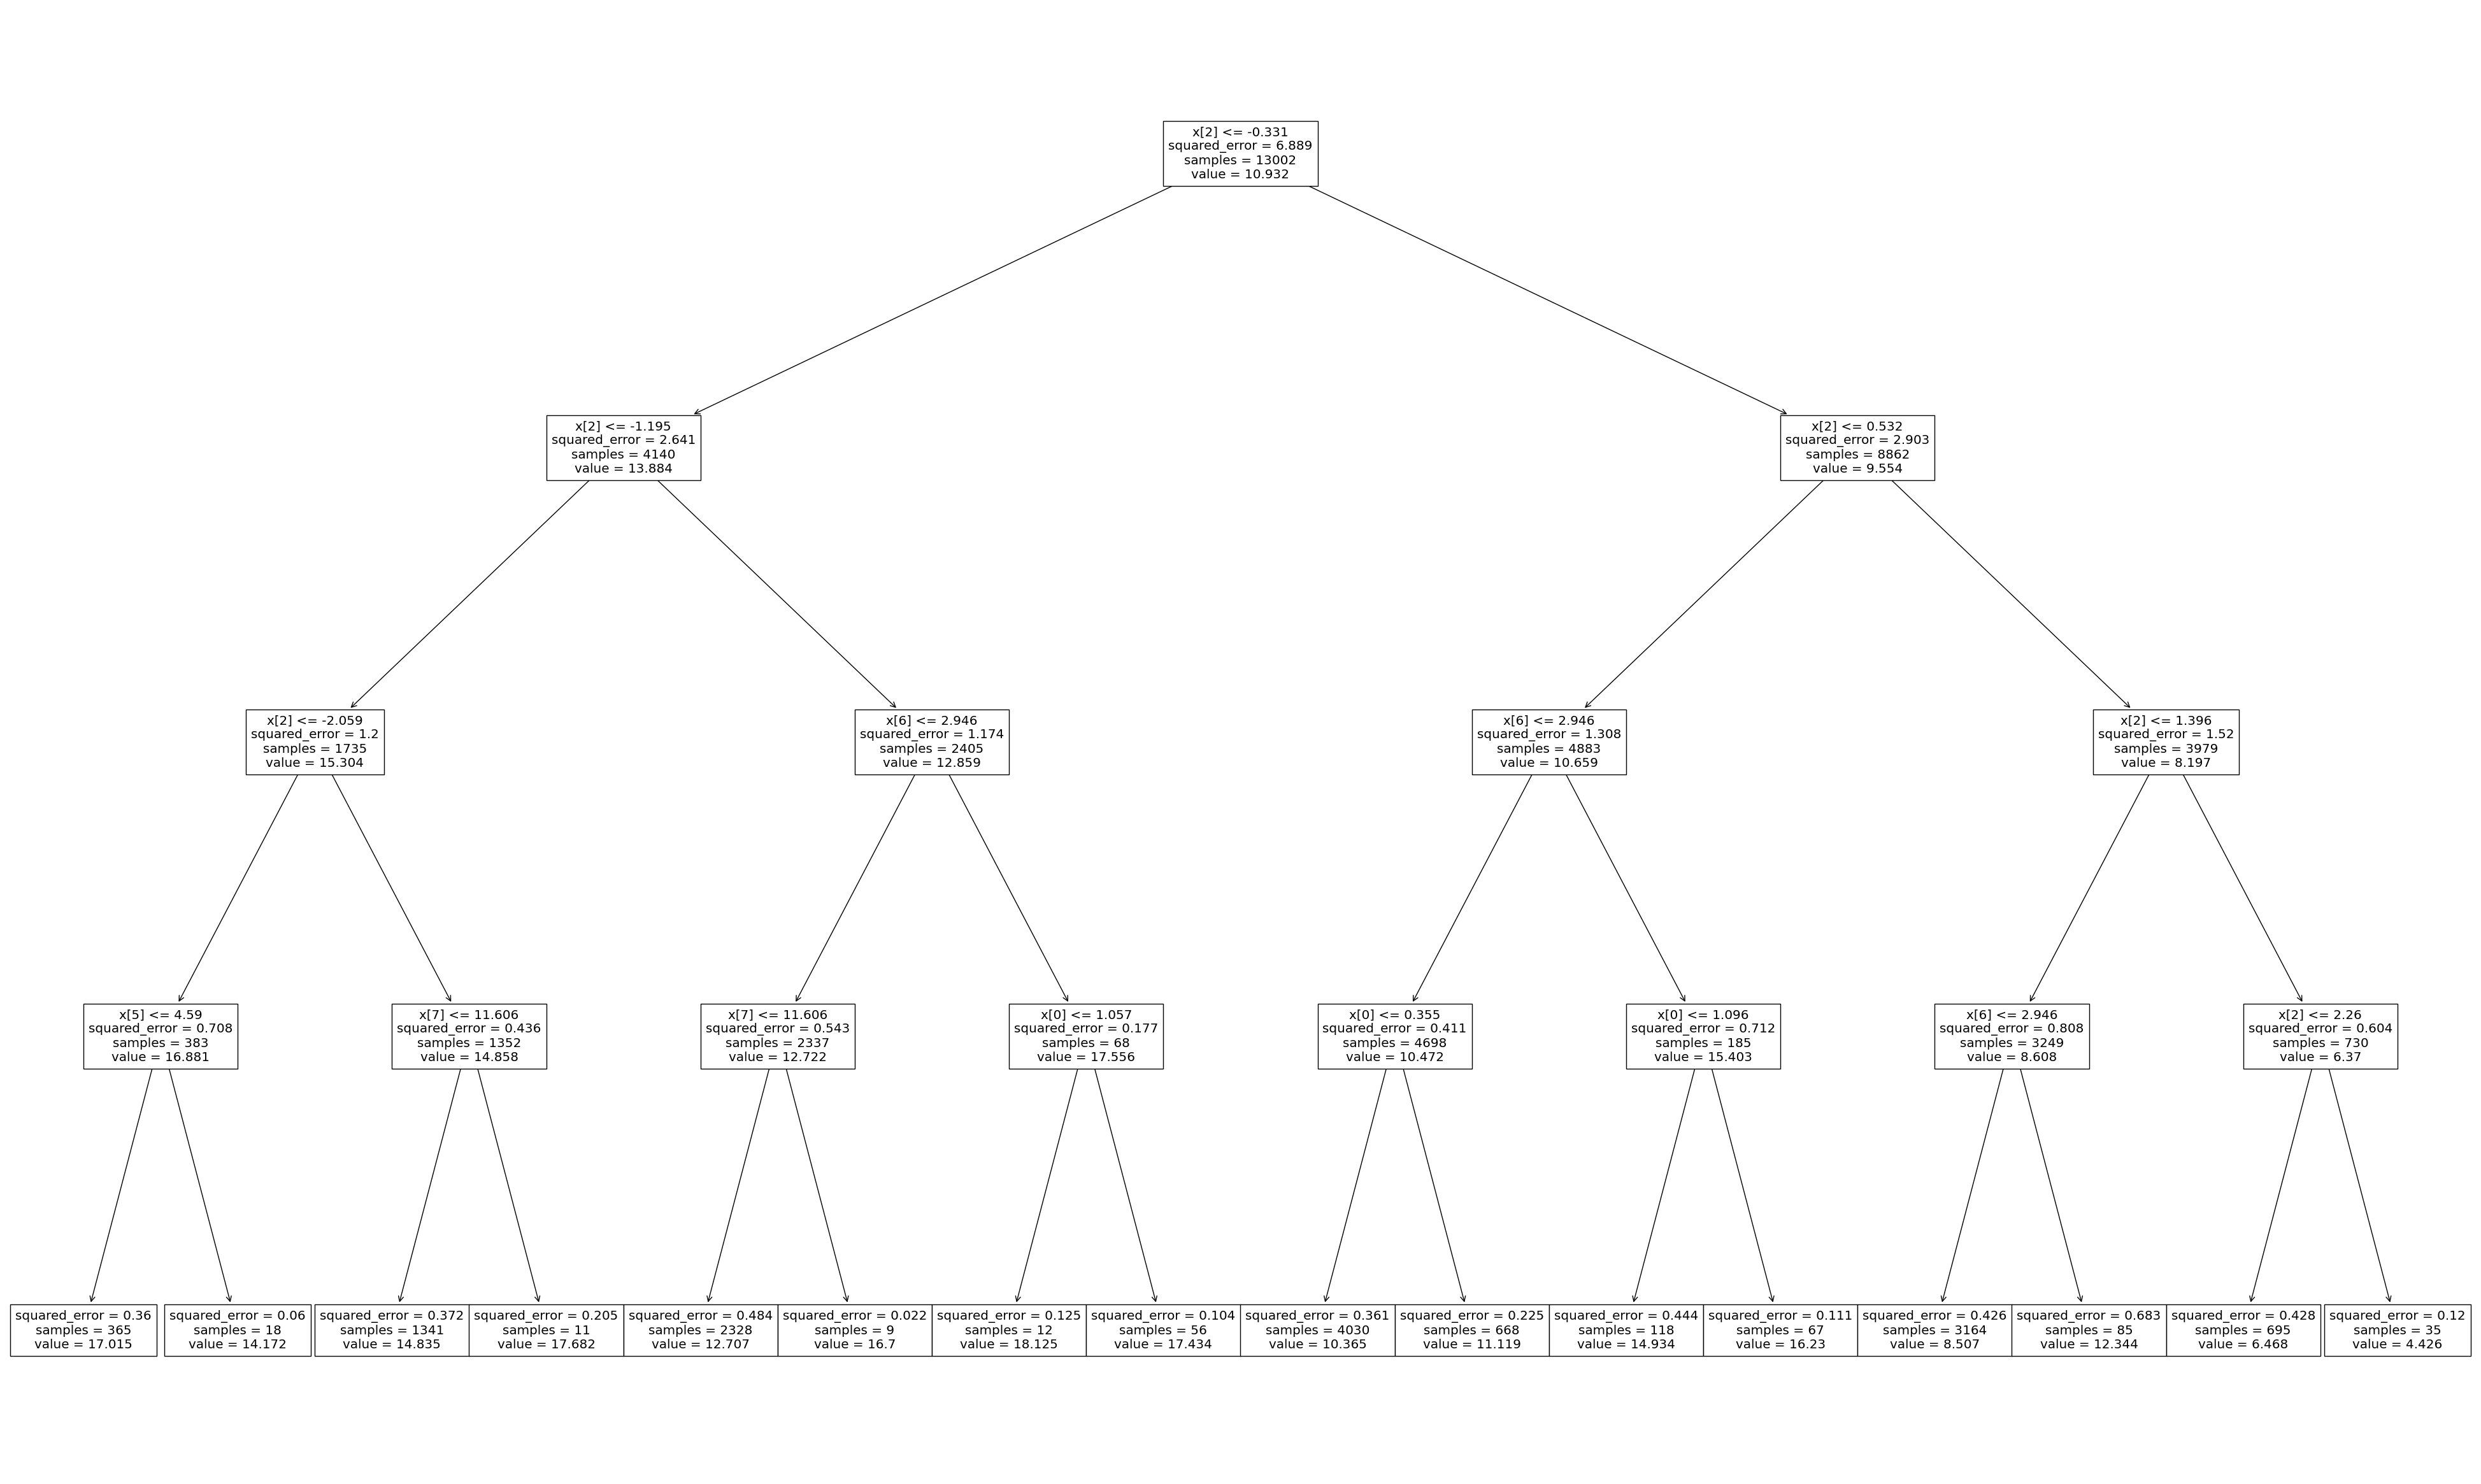

In [674]:
plt.figure(figsize=(50,30))
tree.plot_tree(dc)
plt.show()

RandomForest Regressor

In [675]:
rf = RandomForestRegressor()

In [676]:
no_of_decision_tree = [10,20,30,40,50,60,70,80,90,100]
max_no_of_features = ['sqrt','log2']
max_depth = [6,7,8,9,10,11,12,13,14,15]
criterion_of_decision_tree = ["squared_error", "poisson"]
min_sample_split=[2,3,4,5,6]

In [677]:
random_grid = {
    'n_estimators' : no_of_decision_tree,
    'max_features' : max_no_of_features,
    'max_depth' : max_depth,
    'criterion' : criterion_of_decision_tree,
    'min_samples_split' : min_sample_split
}

Hyper Parameter Tuning

In [684]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(estimator = rf , param_distributions = random_grid , n_iter = 25 , cv = 5 ,n_jobs=2)
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=10,
                                                   max_features='sqrt',
                                                   min_samples_split=4,
                                                   n_estimators=60),
                   n_iter=25, n_jobs=2,
                   param_distributions={'criterion': ['squared_error',
                                                      'poisson'],
                                        'max_depth': [6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

In [685]:
rscv.best_params_

{'n_estimators': 90,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': 14,
 'criterion': 'squared_error'}

In [686]:
rf = RandomForestRegressor(n_estimators = 60 , min_samples_split = 4, max_features =  'sqrt', max_depth = 10, criterion='squared_error')

In [687]:
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [688]:
print("training score = ",rf.score(xtrain,ytrain))
print("testing score = ",rf.score(xtest,ytest))

training score =  0.9682582900849178
testing score =  0.9675553752802821


In [689]:
r2_score(ytest,ypred)

0.9675553752802821

Model Deployment

In [690]:
import os
import pickle as pk

In [691]:
filename = "scaled_data.sav"
pk.dump(sc, open(filename, "wb")) #write binary = wb
loaded_scaler = pk.load(open("scaled_data.sav", "rb")) #read binary = rb

In [692]:
filename = "trained_model_lr.sav"
pk.dump(lr, open(filename, "wb"))
loaded_model = pk.load(open("trained_model_lr.sav", "rb"))

In [693]:
new['Vehicle class'].unique()

array(['Subcompact', 'Compact', 'Two-seater', 'Station wagon: Small',
       'Minicompact', 'Mid-size', 'Station wagon: Mid-size', 'Full-size',
       'Van: Cargo', 'Van: Passenger', 'Pickup truck: Standard',
       'Sport utility vehicle', 'Minivan', 'Pickup truck: Small',
       'Special purpose vehicle', 'Sport utility vehicle: Small',
       'Sport utility vehicle: Standard'], dtype=object)

In [694]:
new['Transmission'].unique()

array(['A', 'M', 'AS', 'AV', 'AM'], dtype=object)

In [695]:
new['Fuel type'].unique()

array(['X', 'Z', 'D', 'N', 'E'], dtype=object)

In [696]:
new['CO2 Rating'].unique()

array([ 8,  7,  6,  5,  4,  9, 10], dtype=int64)

In [697]:
def input_converter(trail_inputs):
    vcl = ['Two-seater','Minicompact','Compact','Subcompact','Mid-size','Full-size','SUV: Small','SUV: Standard','Minivan','Station wagon: Small','Station wagon: Mid-size','Pickup truck: Small','Special purpose vehicle','Pickup truck: Standard']
    trans = ['A', 'M', 'AS', 'AV', 'AM']
    fuel = ['X', 'Z', 'D', 'N', 'E']
    
    lst = []
    for i in range(0,len(trail_inputs)):
        if(type(trail_inputs[i]) == str):
            if(trail_inputs[i] in vcl):
                lst.append(vcl.index(trail_inputs[i]))
            elif(trail_inputs[i] in trans):
                lst.append(trans.index(trail_inputs[i]))
            
            elif(trail_inputs[i] in fuel):
                if(fuel.index(trail_inputs[i]) == 0):
                    lst.extend([1,0,0,0,0])
                    break
                elif(fuel.index(trail_inputs[i]) == 1):
                    lst.extend([0,1,0,0,0])
                    break
                elif(fuel.index(trail_inputs[i]) == 2):
                    lst.extend([0,0,1,0,0])
                    break
                elif(fuel.index(trail_inputs[i]) == 3):
                    lst.extend([0,0,0,1,0])
                    break
                elif(fuel.index(trail_inputs[i]) == 4):
                    lst.extend([0,0,0,0,1])
                    
        else:
            lst.append(trail_inputs[i])

    arr = np.asarray(lst)
    arr = arr.reshape(1, -1)
    arr = loaded_scaler.transform(arr)
    prediction = loaded_model.predict(arr)
    
    return(f"The Fuel Consumption L/100km is {round(prediction[0],2)}")


 
trail_inputs = ["Compact",2.4,2,"A",8,"X"]  
input_converter(trail_inputs)

'The Fuel Consumption L/100km is 17.24'